<a href="https://colab.research.google.com/github/CarolineGuothesweetie/BA780-Lecture-Notes/blob/main/01_A_Preview_of_Data_Science_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Preview of Data Science Tools

If you would like to spring from here and go farther in using Python for scientific computing or data science, there are a few packages that will make your life much easier.
This section will introduce and preview some of the most important ones, and give you an idea of the types of applications they are designed for.
If you're using the *Anaconda* or *Miniconda* environment suggested at the beginning of this class, you can install the relevant packages with the following command:
```
$ conda install numpy scipy pandas matplotlib scikit-learn
```

If you are using Google Colab there is a good chance that all of these packaes were already pre-installed.

Let's take a brief look at each of these in turn.

## NumPy: Numerical Python

NumPy provides an efficient way to store and manipulate multi-dimensional dense arrays in Python.
The important features of NumPy are:

- It provides an ``ndarray`` structure, which allows efficient storage and manipulation of vectors, matrices, and higher-dimensional datasets.
- It provides a readable and efficient syntax for operating on this data, from simple element-wise arithmetic to more complicated linear algebraic operations.

In the simplest case, NumPy arrays look a lot like Python lists.
For example, here is an array containing the range of numbers 1 to 9 (compare this with Python's built-in ``range()``):

In [1]:
import numpy as np
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

NumPy's arrays offer both efficient storage of data, as well as efficient element-wise operations on the data.
For example, to square each element of the array, we can apply the "``**``" operator to the array directly:

In [2]:
x ** 2 #power

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

Compare this with the much more verbose Python-style list comprehension for the same result:

In [ ]:
[val ** 2 for val in range(1, 10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

Unlike Python lists (which are limited to one dimension), NumPy arrays can be multi-dimensional.
For example, here we will reshape our ``x`` array into a two-dimensional 3x3 array:

In [4]:
%%timeit
x = np.arange(1, 1000000)
x2 = x ** 2

The slowest run took 4.29 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 2.78 ms per loop


In [5]:
%%timeit
x2p = [val ** 2 for val in range(1, 1000000)]

1 loop, best of 5: 298 ms per loop


In [6]:
M = x.reshape((3, 3)) # plz give me a matrix of 3 by 3 :)
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

A two-dimensional array is one representation of a matrix, and NumPy knows how to efficiently do typical matrix operations. For example, you can compute the transpose using ``.T``:

In [ ]:
M.T # 转置

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

or a matrix-vector product using ``np.dot``:

In [ ]:
np.dot(M, [5, 6, 7])

array([ 38,  92, 146])

and even more sophisticated operations like eigenvalue decomposition:

In [ ]:
np.linalg.eigvals(M)

array([ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16])

Such linear algebraic manipulation underpins much of modern data analysis, particularly when it comes to the fields of machine learning and data mining.

## Pandas: Labeled Column-oriented Data

Pandas is a much newer package than NumPy, and is in fact built on top of it.
What Pandas provides is a labeled interface to multi-dimensional data, in the form of a DataFrame object that will feel very familiar to users of R, Excel, and related languages.
DataFrames in Pandas look something like this:

In [7]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'col2': [1, 2, 3, 4, 5, 6]})
df

,col1,col2
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


The Pandas interface allows you to do things like select columns by name:

In [ ]:
#pd.DataFrame

In [ ]:
# first way to grab one of the columns
df['col1']

0    A
1    B
2    C
3    A
4    B
5    C
Name: col1, dtype: object

In [8]:
type(df['col1']) #panda series

pandas.core.series.Series

In [9]:
df['col1'].values

array(['A', 'B', 'C', 'A', 'B', 'C'], dtype=object)

In [10]:
df['col1'].index

RangeIndex(start=0, stop=6, step=1)

In [11]:
# second way to grab one of the columns <- only useful when there exsits no special characters like space 
df.col1

0    A
1    B
2    C
3    A
4    B
5    C
Name: col1, dtype: object

In [17]:
df.describe()

,col2
count,6.000000
mean,3.500000
std,1.870829
min,1.000000
25%,2.250000
50%,3.500000
75%,4.750000
max,6.000000


In [14]:
df.shape

(6, 2)

Apply string operations across string entries:

In [18]:
df['col1'].str.lower()

0    a
1    b
2    c
3    a
4    b
5    c
Name: col1, dtype: object

Apply aggregates across numerical entries:

In [19]:
df['col2'].sum()

21

And, perhaps most importantly, do efficient database-style joins and groupings:

In [20]:
df.groupby('col1').sum()

,col2
col1,
A,5
B,7
C,9


Here in one line we have computed the sum of all objects sharing the same label, something that is much more verbose (and much less efficient) using tools provided in Numpy and core Python.

## Matplotlib MatLab-style scientific visualization

Matplotlib is one of the most popular scientific visualization packages in Python.
Even proponents admit that its interface is sometimes overly verbose, but it is a powerful library for creating a large range of plots.

To use Matplotlib, we can start by enabling the notebook mode (for use in the Jupyter notebook) and then importing the package as ``plt``"

- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

In [26]:
import numpy as np
import pandas as pd

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # make graphs in the style of R's ggplot

Now let's create some data (as NumPy arrays, of course) and plot the results:

In [28]:
x = np.linspace(1,100)

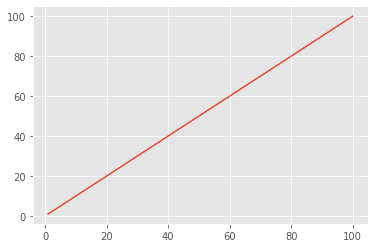

In [29]:
plt.plot(x,x)

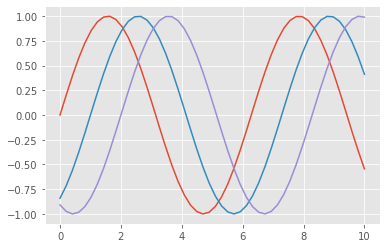

In [24]:
x = np.linspace(0, 10)  # range of 50 values from 0 to 10
plt.plot(x, np.sin(x - 0));         # plot as a line
plt.plot(x, np.sin(x - 1));     # plot as a line
plt.plot(x, np.sin(x - 2));     # plot as a line

### Matplotlib method on pandas DataFrame

It is also possible to create a plot directly from a pandas dataframe. For instance, below we create a chart off of our synthetic DataFrame `df`:

In [ ]:
# plot in time series

In [30]:
np.random.randn(10, 2)

array([[ 0.56247662,  1.93687675],
       [ 0.55620191,  0.50215912],
       [ 1.19802736,  0.50053994],
       [-0.75163395, -1.55190072],
       [ 0.2971829 ,  1.3009188 ],
       [-0.49467237, -0.14904616],
       [-0.49820852,  0.06844577],
       [-0.48894542, -0.62192717],
       [-0.50214196, -0.86854126],
       [ 0.85239729, -0.03151848]])

In [32]:
df = pd.DataFrame(np.random.randn(1000, 4),
                   columns=list('ABCD'))
df = df.cumsum()
df

,A,B,C,D
0,-1.717018,1.769812,-0.570434,-0.580309
1,-1.580444,1.390876,-0.605689,1.203585
2,-0.642181,2.427250,-1.496297,1.101573
3,-0.617478,1.058303,-1.305817,1.456816
4,-2.346479,1.611619,-1.072091,0.670566
...,...,...,...,...
995,5.110057,-81.348889,3.710962,41.632083
996,5.577556,-81.149587,4.652210,39.716667
997,3.991687,-80.970309,4.402051,39.301583
998,4.828518,-81.691428,5.386769,39.393101


In [37]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('7/1/2016', periods=1000), columns=list('ABCD')) # time series data
df = df.cumsum()
df

,A,B,C,D
2016-07-01,0.593584,0.572434,-1.070036,-0.350939
2016-07-02,0.340874,0.080262,-3.287722,0.043368
2016-07-03,-1.861191,-2.630107,-2.023344,1.321222
2016-07-04,-1.416838,-2.069333,-1.505033,0.647498
2016-07-05,-1.582980,-2.015921,-1.767093,2.225301
...,...,...,...,...
2019-03-23,-17.747252,15.270944,42.565573,33.091567
2019-03-24,-18.012763,14.615020,41.592245,33.420478
2019-03-25,-18.656113,15.963456,40.822536,32.039880
2019-03-26,-17.904692,16.842756,42.412293,32.319570


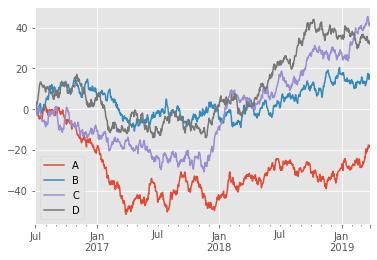

In [38]:
df.plot()

This is the simplest example of a Matplotlib plot; for ideas on the wide range of plot types available, see [Matplotlib's online gallery](http://matplotlib.org/gallery.html). We will come back to Matplotlib in the future classes.

## Other Data Science Packages

Built on top of these tools are a host of other data science packages, including general tools like [Scikit-Learn](http://scikit-learn.org) for machine learning, [Scikit-Image](http://scikit-image.org) for image analysis, and [Statsmodels](http://statsmodels.sourceforge.net/) for statistical modeling, as well as more domain-specific packages like [AstroPy](http://astropy.org) for astronomy and astrophysics, [NiPy](http://nipy.org/) for neuro-imaging, and many, many more.

No matter what type of scientific, numerical, or statistical problem you are facing, it's likely there is a Python package out there that can help you solve it.